In [1]:
import keras

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Zbiór treningowy w postaci wektora.
x_train = vectorize_sequences(train_data)
# Zbiór testowy w postaci wektora.
x_test = vectorize_sequences(test_data)
# Etykiety w postaci wektorów.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Spróbujmy zastąpić ten model prostszą siecią neuronową:

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])


Oto porównanie straty walidacji oryginalnej sieci i mniejszej sieci. Kropkami oznaczono wartości straty walidacji mniejszej sieci, a krzyżykami oznaczono wartości straty oryginalnej sieci (przypominam, że mniejsza wartość straty walidacji świadczy o tym, że model jest lepszy).

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 104ms/step - loss: 0.4714 - acc: 0.8108 - val_loss: 0.3505 - val_acc: 0.8772
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2706 - acc: 0.9093 - val_loss: 0.2978 - val_acc: 0.8826
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2075 - acc: 0.9272 - val_loss: 0.2801 - val_acc: 0.8884
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1739 - acc: 0.9389 - val_loss: 0.2884 - val_acc: 0.8841
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1489 - acc: 0.9485 - val_loss: 0.3021 - val_acc: 0.8822
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1312 - acc: 0.9546 - val_loss: 0.3235 - val_acc: 0.8781
Epoch 7/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1157 - acc: 0.9612 - val_loss: 0.3474 - val_acc: 0.8731
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1018 - 

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 69ms/step - loss: 0.5884 - acc: 0.7075 - val_loss: 0.5317 - val_acc: 0.8006
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.4852 - acc: 0.8421 - val_loss: 0.4891 - val_acc: 0.8542
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.4403 - acc: 0.8913 - val_loss: 0.4694 - val_acc: 0.8672
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.4086 - acc: 0.9158 - val_loss: 0.4562 - val_acc: 0.8781
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3832 - acc: 0.9305 - val_loss: 0.4516 - val_acc: 0.8768
Epoch 6/20
49/49 [==============================] - 1s 28ms/step - loss: 0.3627 - acc: 0.9397 - val_loss: 0.4528 - val_acc: 0.8730
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.3433 - acc: 0.9476 - val_loss: 0.4503 - val_acc: 0.8744
Epoch 8/20
49/49 [==============================] - 2s 31ms/step - loss: 0.3260 - a

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

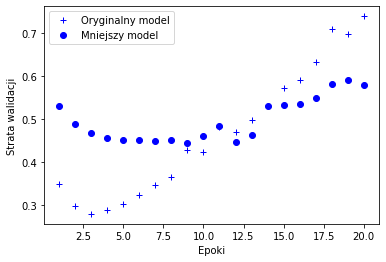

In [8]:
import matplotlib.pyplot as plt

# b+ to niebieskie krzyżyki
plt.plot(epochs, original_val_loss, 'b+', label='Oryginalny model')
# bo to niebieskie kropki
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Mniejszy model')
plt.xlabel('Epoki')
plt.ylabel('Strata walidacji')
plt.legend()

plt.show()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 12s 233ms/step - loss: 0.4569 - acc: 0.8004 - val_loss: 0.2916 - val_acc: 0.8826
Epoch 2/20
49/49 [==============================] - 11s 225ms/step - loss: 0.2119 - acc: 0.9141 - val_loss: 0.3224 - val_acc: 0.8680
Epoch 3/20
49/49 [==============================] - 13s 263ms/step - loss: 0.1228 - acc: 0.9538 - val_loss: 0.3548 - val_acc: 0.8747
Epoch 4/20
49/49 [==============================] - 12s 247ms/step - loss: 0.0681 - acc: 0.9814 - val_loss: 0.4423 - val_acc: 0.8793
Epoch 5/20
49/49 [==============================] - 11s 229ms/step - loss: 0.0665 - acc: 0.9882 - val_loss: 0.4336 - val_acc: 0.8808
Epoch 6/20
49/49 [==============================] - 11s 225ms/step - loss: 0.0024 - acc: 0.9998 - val_loss: 0.7033 - val_acc: 0.8810
Epoch 7/20
49/49 [==============================] - 11s 224ms/step - loss: 0.1249 - acc: 0.9864 - val_loss: 0.5893 - val_acc: 0.8792
Epoch 8/20
49/49 [==============================] - 12s 241ms/step - 

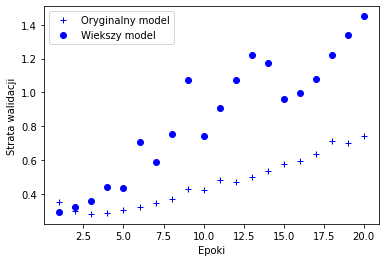

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Oryginalny model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Wiekszy model')
plt.xlabel('Epoki')
plt.ylabel('Strata walidacji')
plt.legend()

plt.show()

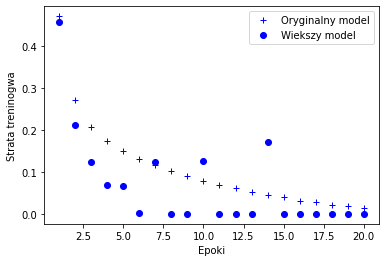

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Oryginalny model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Wiekszy model')
plt.xlabel('Epoki')
plt.ylabel('Strata treninogwa')
plt.legend()

plt.show()

## Dodawanie regularyzacji wag

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

Argument l2(0.001) oznacza, że każdy współczynnik macierzy wag warstwy doda wartość równą 0.001 * weight_coefficient_value (0,001 razy wartość współczynnika wagi) do całkowitej straty sieci. Kara ta jest dodawana tylko podczas trenowania, a więc strata sieci w czasie trenowania będzie o wiele wyższa niż w czasie testowania.

Oto wykres, na którym pokazano wpływ kary w postaci regularyzacji L2:

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 88ms/step - loss: 0.4797 - acc: 0.8253 - val_loss: 0.3689 - val_acc: 0.8832
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.3054 - acc: 0.9076 - val_loss: 0.3296 - val_acc: 0.8890
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2655 - acc: 0.9229 - val_loss: 0.3294 - val_acc: 0.8875
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2432 - acc: 0.9296 - val_loss: 0.3364 - val_acc: 0.8850
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2329 - acc: 0.9344 - val_loss: 0.3648 - val_acc: 0.8749
Epoch 6/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2217 - acc: 0.9394 - val_loss: 0.3910 - val_acc: 0.8664
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2187 - acc: 0.9402 - val_loss: 0.3775 - val_acc: 0.8740
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2132 - a

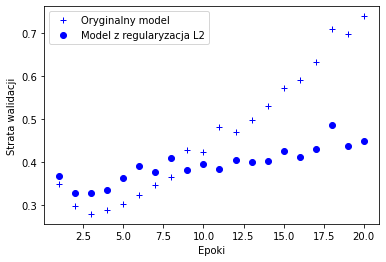

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Oryginalny model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='Model z regularyzacja L2')
plt.xlabel('Epoki')
plt.ylabel('Strata walidacji')
plt.legend()

plt.show()

In [17]:
from keras import regularizers

# Regularyzacja L1.
regularizers.l1(0.001)

# Jednoczesna regularyzacja L1 i L2.
regularizers.l1_l2(l1=0.001, l2=0.001)

## Porzucanie — technika dropout

W pakiecie Keras technikę tę można zastosować przy użyciu warstwy Dropout, którą umieszcza się bezpośrednio za wyjściem znajdującej się wcześniej warstwy:


Dodajmy dwie warstwy Dropout do sieci IMDB i zobaczmy, czy pomogą one w zredukowaniu nadmiernego dopasowania:

In [20]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [21]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 92ms/step - loss: 0.5911 - acc: 0.6935 - val_loss: 0.4415 - val_acc: 0.8667
Epoch 2/20
49/49 [==============================] - 1s 29ms/step - loss: 0.4266 - acc: 0.8332 - val_loss: 0.3425 - val_acc: 0.8802
Epoch 3/20
49/49 [==============================] - 1s 29ms/step - loss: 0.3421 - acc: 0.8804 - val_loss: 0.2943 - val_acc: 0.8866
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2896 - acc: 0.9024 - val_loss: 0.2908 - val_acc: 0.8789
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2517 - acc: 0.9176 - val_loss: 0.2840 - val_acc: 0.8856
Epoch 6/20
49/49 [==============================] - 1s 29ms/step - loss: 0.2233 - acc: 0.9271 - val_loss: 0.2962 - val_acc: 0.8868
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1996 - acc: 0.9361 - val_loss: 0.3086 - val_acc: 0.8854
Epoch 8/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1869 - a

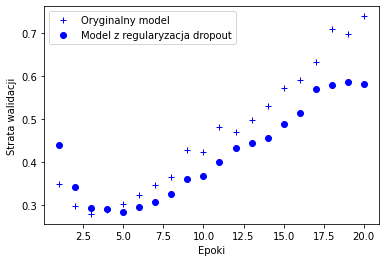

In [22]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Oryginalny model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Model z regularyzacja dropout')
plt.xlabel('Epoki')
plt.ylabel('Strata walidacji')
plt.legend()

plt.show()


Ponownie widać poprawę względem sieci referencyjnej.

Reasumując, oto najczęściej stosowane techniki mające zapobiec nadmiernemu dopasowaniu sieci neuronowych:

* Zdobycie większej ilości danych treningowych.
* Redukcja pojemności sieci.
* Dodanie regularyzacji wag.
* Dodanie mechanizmu porzucania.